# Домашнее задание по свертке (ЧТОБЫ ПОЛУЧИТЬ ПРАВИЛЬНЫЕ ОТВЕТЫ ЗАПУСКАЙТЕ ВСЕ ЗАДАНИЯ В КОЛАБЕ, КРОМЕ ВИЗУАЛИЗАЦИИ С ПОЛЗУНКОМ)

Сначала мы немного поговорим про то, что такое свертка в математическом плане и свяжем ее с тем, что используется в нейросетях. Это поможет понять, как именно вычисляется свертка и почему она помогает обрабатывать картинки. В задании достаточно много сложных вещей, которые помечены как материал для продвинутых. Если Вы учитесь в студенческом потоке, то Вы должны изучить продвинутую теорию. Для школьников этот материал не обязателен.

Немного терминологии: **фильтры**, которые применяются к картинке в сверточном слое, также называются **ядро** и **kernel**.
<img src="https://i.imgflip.com/2yq7h7.jpg" width=600>

## Математическое опредление

На самом деле сверточные нейросети так называются, потому что операция, которую они производят над входными данными, в математике называется свертка. Выглядит она вот так:

$$(f*g)(x) = \int \limits^{+\infty}_{-\infty} f(\tau)g(x - \tau) d\tau$$

Где f, g вредставляют собой функции от координат задающие ядро и саму картинку. Если быть точнее, то в случае нейросетей вместо интеграла будет обычная сумма, так как картинка и ядро заданы пикселями, а значит функции дискретные. 
(_на самом деле аналогия не совсем правильная, потому что свертки в нейросетях немного отличаются от математических сверток, но эти различия незначительные_)

Есть несколько взглядов на то, как можно использовать свертку. Рассмотрим наиболее интересные применения, которые помогут нам глуже понять эту операцию.

## Свертка для преобразования сигналов.

### Одномерные сигналы (advanced)


Если Вы когда-нибудь сталкивались с обработкой сигналов, то Вы сталкивались и со сверткой. Она очень часто применяется в этой области для многих вещей. Например, с помощью свертки можно убирать из сигнала шум, как на картинке ниже. Вверху зашумленный сигнал (например, измерения давления), а снизу справа очищенный.

<img src="https://cdn-images-1.medium.com/max/1600/1*V2j4icieU9aAi3gW2ESqOw.png" width=400>
<img src="https://cdn-images-1.medium.com/max/1600/1*OiCIOkDIockKUIw6snQIxw.png" width=700>
(Изображение взято из [статьи на medium](https://towardsdatascience.com/convolution-a-journey-through-a-familiar-operators-deeper-roots-2e3311f23379))

### Картинки

&mdash; Хорошо, а как это относится к картинкам? Они что, тоже сигнал?

&mdash; ДА!

Вообще, если мы хотим рассматривать свертку в контексте математики, нам нужно как-то закодировать картинки в математические объекты. Логичнее всего сделать картинку дискретной функцией от двух переменных - x и y. По соответствующим координатам функция возвращает насыщенность пикселя. То же самое работает и для фильтров.

Такой метод работает только для серых картинок, да и в формулах мы нигде пользоваться этим не будем, но помнить о том, что функция может быть картинкой полезно.

&mdash; В предыдущем примере используя специально подобранный фильтр мы смогли избавитсья от шума в сигнале, как сделать такое же с картинкой? 

&mdash; Нужно использовать точно такой же фильтр, но двумерный.

Испробовать такие фильтры сами Вы можете на сайте http://setosa.io/ev/image-kernels. На мой взгляд, очень помогает понять, как работает свертка для серых картинок. 
<img src="https://github.com/aogavrilov/deep_learning_2018-19/blob/master/08.%20Convolutional%20Networks/files/sum_1.png?raw=1"  width=900>
Изучите внимательно предыдущий сайт и напишите свою свертку для серых картинок. 

# [Задание 1]

In [0]:
!pip install imageio

import scipy.misc
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from imageio import imread
from ipywidgets import interact, FloatSlider

%matplotlib inline

def grayscale(img):
    """
    Чтобы привести к серому мы просто возьмем красный канал)
    """
    return img[:, :, 0]

def show_img(img):
    """
    Красиво выводит картинку с помощью matplotlib
    """
    plt.figure(figsize=(10, 6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cm.Greys_r)
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def seed_random(size, seed):
    np.random.seed(seed)
    return np.random.normal(size=size)

def load_img(img_path):
    return imread(img_path) / 255

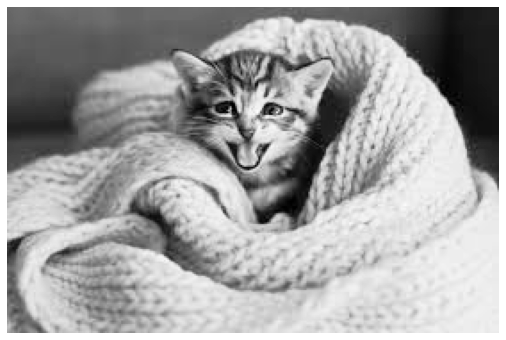

In [0]:
# Загрузим картинку
gray_img = grayscale(load_img('https://raw.githubusercontent.com/aogavrilov/deep_learning_2018-19/master/08.%20Convolutional%20Networks/img.jpeg'))
show_img(gray_img)

In [0]:
def convolve(img, kernel):
    """
    Эта функция будет принимать на вход массив с числами, характеризующими картинку 
    img.shape = (y, x), и kernel.shape = (y, x).
    Это самый простой вариант функции, которая работает только с серыми картинками (картинками с одним каналом).
    Свертка должна производиться без padding и stride, добавим их позже.
    Так как у нас один кернел, то и канал у выходной картинки будет один.
    Ничего кроме свертки проихводить не нужно, ни добавлять bias, ни применять функцию активации.
    """
    kernel_y, kernel_x = kernel.shape[:2]
    img_y, img_x = img.shape[:2]

    result = np.zeros((img_y - kernel_y + 1, img_x - kernel_x + 1))
    # поитерируемся по x и y
    for i in range(img_y - kernel_y + 1):
      for j in range(img_x - kernel_x + 1):
        value = 0
        for i1 in range(kernel_y):
          for j1 in range(kernel_x):
            value += img[i + i1][j + j1] * kernel[i1][j1]
        result[i][j] = value

    
    return result

Теперь протестируем нашу свертку с фильтрами. Если Вы последовали рекомендации и написали ее через вложенные for циклы, то работать будет долго, порядка 10 секунд. 

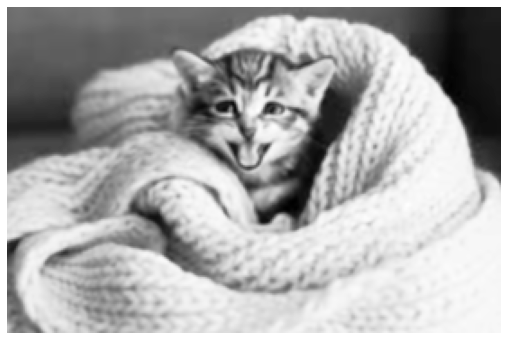

In [0]:
# применим размывающий фильтр
blur_filter = np.array([[0.0625, 0.125, 0.0625],
                           [0.125, 0.25, 0.125],
                           [0.0625, 0.125, 0.0625]])

sharpened_img = convolve(gray_img, blur_filter).clip(0, 1)
show_img(sharpened_img)

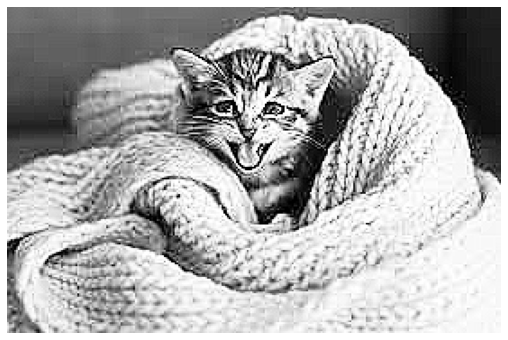

In [0]:
# применим фильтр, увеличивающий резкость
sharpen_filter = np.array([[0, -1, 0],
                           [-1, 5.1, -1],
                           [0, -1, 0]])

sharpened_img = convolve(gray_img, sharpen_filter).clip(0, 1)
show_img(sharpened_img)

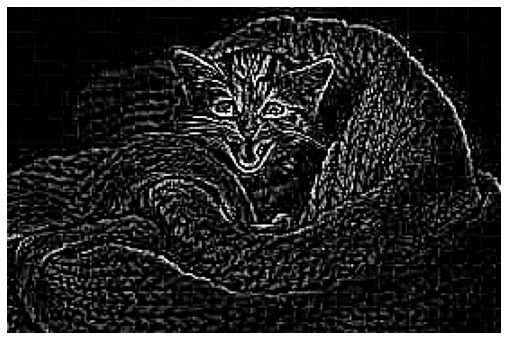

In [0]:
# применим фильтр, оставляющий границы объектов
outline_filter = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

outline_img = convolve(gray_img, outline_filter).clip(0, 1)
show_img(outline_img)

Надеюсь, что у Вас получилось и все работает, как надо. Теперь нужно получить ответ, который мы сможем проверить в Canvas. Так как мы не хотим, чтобы Вы пользовались в этом задании сверткой из pytorch, то нужно как-то изменить внутреннее поведение свертки. В свертке мы суммируем попарные произведения чисел из картинки и из фильтра, изменим это. 

__!!!Замените сумму на произведение, примените измененную свертку к gray_img с фильтром outline_filter и введите в ответ на первое задание на Канвасе сумму всех пикселей в получившейся картинке, клипать не нужно!!!__

In [0]:
def my_operation(img, kernel):
    """
    Скопируйте сюда реализацию свертки, которую Вы сделали выше и замените сумму на произвдение.
    Это очень просто сделать, если свертка реализована как два вложенных цикла
    """
    kernel_y, kernel_x = kernel.shape[:2]
    img_y, img_x = img.shape[:2]
    result = np.ones((img_y - kernel_y + 1, img_x - kernel_x + 1))
    # поитерируемся по x и y
    for i in range(img_y - kernel_y + 1):
      for j in range(img_x - kernel_x + 1):
        value = 1
        for i1 in range(kernel_y):
          for j1 in range(kernel_x):
            value *= img[i + i1][j + j1] * kernel[i1][j1]
        result[i][j] = value
    
    return result

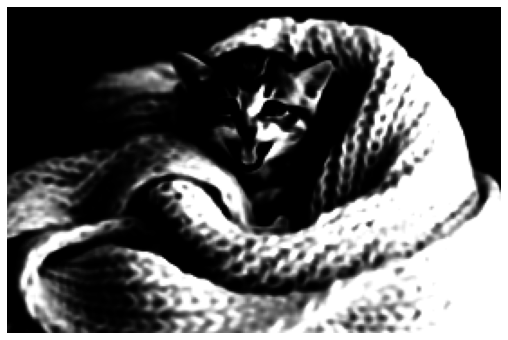

15693.84253216934

In [0]:
# применим новую свертку и возьмем сумму
res = 0
outline_img = my_operation(gray_img, outline_filter).clip(0, 1)
show_img(outline_img)
for i in range(outline_img.shape[0]):
  for j in range(outline_img.shape[1]):
    res += outline_img[i][j]
res

## Свертка для извлечения локальной информации

**[Advanced]**

Если еще раз посмотреть на определение свертки, то мы видим, что ее значение в точке является взвешенной суммой значений функции $f(x)$, но с одним интересным свойством, чтобы получить значение свертки в точке x, мы двигаем функцию $g(x)$, которая и задает веса, на х. (Чуть позже будет иллюстрация, которая поможет понять, что это значит).
$$(f*g)(x) = \int \limits^{+\infty}_{-\infty} f(\tau)g(x - \tau) d\tau$$


**[Not advanced]**


Теперь вернемся к сверткам в нейронных сетях. На лекции было сказано, что сверточные слои намного лучше обрабатывают картинки, чем полносвязные. Причина в том, что сверточные слои эксплуатируют внешние знания о структуре данных:

* Пиксели находящиеся рядом намного сильнее связаны между собой, чем дальние.
* Мы можем сдвинуть объект на картинке и он останется собой.

Эти предположения можно переформулировать в более сжатом виде: в данных важна именно локальная структура. Такие жесткие ограничения позволяют сверточным слоям использовать намного меньше весов, применяя один и тот же небольшой фильтр ко всем частям картинки. Это, в свою очередь, упрощает обучение нейронной сети.

## Свертка для нахождения похожих паттернов

Давайте посмотрим на небольшую иллюстрацию того, как просчитывается свертка в одномерном случае

In [0]:
def f(x):
    """
    Просто красивая функция.
    """
    return 1/(2 + x**2 * (0.1 + np.sin(x)**2))


def g(x):
    """
    Эта функци - немного измененная плотность нормального распределения, потому что она тоже красивая.
    """
    return np.exp(-x**2/2) / np.sqrt(2 * np.pi)


x = np.linspace(-10, 10, 100)
@interact(g_offset=FloatSlider(min=-10, max=10, step=0.5))
def plot_and_calc(g_offset):
    plt.figure(figsize=(10, 7))
    f_val = f(x)
    g_val = g(g_offset - x)
    mul_vals = f_val * g_val

    plt.plot(x, f_val, label='f(x)')
    plt.plot(x, g_val, label='g(x)')
    plt.plot(x, mul_vals, label='f(x)*g(x)')
    plt.gca().fill_between(x, 0, mul_vals)
    plt.legend()

    plt.text(-10.5, 0.55,
             "Approximate conv value at {} = {:.2f}".format(g_offset, mul_vals.sum()))

interactive(children=(FloatSlider(value=0.0, description='g_offset', max=10.0, min=-10.0, step=0.5), Output())…

Перемещая ползунок, Вы видите как перемещается функция $g(x)$, задающая веса для аггрегирования. Значение свертки в точке, которую Вы задаете g_offset, равно площади под кривой $f(x)\cdot g(x)$.

Легко заметить, что чем лучше совпадают две функции, чем более они похожи, тем выше значение свертки. Максимум доостигается при нулевом сдвиге $g(x)$, когда совпадают два толстых пика. Но большие значения получаются и при совпадении малых пиков с $g(x)$. 

**Посмотрев на значения свертки мы можем догадаться, где на функции $f(x)$ находятся пики.**

Использование свертки для нахождения каких-то особых частей в функции - одна из самых интересных трактовок с точки зрения Deep Learning. В случае картинок в качестве $f(x)$ выступает картинка, а в качестве $g(x)$ кернел, который мы перемещаем по картинке и ищем совпадения. Только кернелы не заданы заранее, а выучиваются самой нейронной сетью в зависимости от того, какие паттерны ей понадобятся. 

У хорошо обученных нейросетей на первом слое можно увижеть паттерны, которые они распознают: 
<img src="http://cs231n.github.io/assets/nn3/cnnweights.jpg" width=600>
(Изображение взято из http://cs231n.github.io/neural-networks-3/#vis)

# [Задание 2]

<img src="https://i.imgflip.com/2yq5nl.jpg">

In [0]:
# Пришло время поиграть в сыщиков
# Загрузите файл noisy_data.txt и с помощью свертки найдите в нем кресты(плюсики) высотой 5 и шириной 5.
# Такие кресты состоят из одинаковых положительных чисел и их можно легко найти, подобрав нужный паттерн.
# Все значения, кроме крестов, являются числами из нормального распределения со средним 0 и норм. отклонением 1
noise = np.loadtxt('https://raw.githubusercontent.com/aogavrilov/deep_learning_2018-19/master/08.%20Convolutional%20Networks/noisy_data.txt')
# Для начала зададим паттерн размера 5*5 для поиска.
# Учитывая описание данных вверху, попробуйте подобрать нужный паттерн.
pattern = np.array([[-1, -1, 1, -1, -1], 
                    [-1, -1, 1, -1, -1],
                    [1, 1, 2, 1, 1],
                    [-1, -1, 1, -1, -1],
                    [-1, -1, 1, -1, -1]])

# Лучше всего использовать свою свертку, написанную ранее.
convolution_activation = convolve(noise, pattern)

In [0]:
# Выберем среди активаций три наибольших (потому что крестов именно три :)
# В нахождении индексов этих максимальных активаций Вам может помочь функция numpy.where и оператор сравнения
res = []
tmp = convolution_activation.reshape(len(convolution_activation) * len(convolution_activation[0]))

while(len(res) < 3):
  for i in range(len(convolution_activation)):
    for j in range(len(convolution_activation[0])):
      if(convolution_activation[i][j]  == max(tmp)):
        if(len(res) < 3):
          res.append((i, j))
          convolution_activation[i][j] = -1
res


[(40, 23), (49, 0), (11, 31)]

**!!!Чтобы получить ответ, Вы должны найти центры трех крестов и сложить все их координаты. Будьте внимательны, потому что координаты, которые вы получили выше могут не являются центрами крестов!!!**

## Сверточный слой

Надеюсь, что вы уже поняли, что такое свертка и как она считается. Теперь перейдем к применению сверток в нейросетях. Для начала мы сами напишем свой сверточный слой. Вы уже писали свертку, но только для двумерной картинки,
пришло время понять, как это делать для батча картинок с несколькими фильтрами. **Так как теперь у нашей картинки есть несколько каналов, то и фильтры теперь имеют несколько каналов, по одному на каждый канал входной картинки, чтобы их все так же можно было накладывать друг на друга, поэлементно умножать и складывать.**

Сейчас вам предстоит написать ConvLayer(in_channels, out_channels, kernel_size). Я думаю, что лучше всего это получится сделать опираясь на иллюстрацию, находящуюся на этой странице http://cs231n.github.io/convolutional-networks (чтобы перейти к ней нажмите Ctrl+F и введите Convolution Demo).

In [0]:
class ConvLayer:
    def __init__(self, in_channels, out_channels, kernel_size):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        
        # Теперь инициализируем массив с кернелами
        self.kernels = seed_random((out_channels, kernel_size, kernel_size, in_channels), 42)
        # Чтобы разобраться, что здесь написано, вспомним, что происзодит в сверточном слое.
        # 1) В сверточном слое применеяется несколько фильтров, каждый из них ищет в картинке какую-то особенность,
        # каждый фильтр производит свою двумерную картинку, состоящую из активаций. На иллюстрации, которая 
        # приложена выше это как раз можно наблюдать. После этого каждая карта активаций становится каналом
        # в новой катинке, которая и является выходом сети. Поэтому число фильтров равно числу выходных каналов.
        # 2) При этом каждый фильтр содержит несколько шаблонов размера kernel_size*kernel_size, чтобы 
        # собираться информацию с каждого из входных каналов. Количество таких двумерных шаблонов равно количеству
        # каналов во входной картинке. 
        self.biases = seed_random((out_channels), 13)
        
    def forward(self, X):       
        # Инициализируем массив с реузльтатом работы всертки
        res = np.zeros((X.shape[0], X.shape[1] - self.kernel_size + 1,
                        X.shape[2] - self.kernel_size + 1, self.out_channels))
        # используем четыре вложенных цикла, чтобы посчитать свертку. Сначала по картинкам в батче, потом по 
        # фильтрам, а потом по координатам. !!!Не забудьте добавить bias!!!
        # применять функцию активации не нужно.
        for i, img in enumerate(X):
            for out_channel in range(self.out_channels):
              for y in range(X.shape[1] - self.kernel_size + 1):
                for x in range(X.shape[2] - self.kernel_size + 1):
                  value = 0
                  for in_channel in range(self.in_channels):#convolve(img, kernel)
                    for y_kern in range(self.kernel_size):
                      for x_kern in range(self.kernel_size):
                        value += img[y + y_kern][x + x_kern][in_channel] * self.kernels[out_channel][y_kern][x_kern][in_channel] 
                  res[i][y][x][out_channel] = value + self.biases[out_channel]
        
        return res
  

Чтобы протестировать свертку опять вернемся к картинке с котиком и попробуем сделать так, чтобы после применения фильтра резкости у нас получалась не серая картинка. Самый простой способ - применить фильтр отедеьно к каждому каналу. Для этого нужно сделать три кернела, каждый из которых работает только со своим каналом в исходной картинке.

In [0]:
# Создадим наш слой

conv = ConvLayer(3, 3, 3)
r_filter = np.zeros((3, 3, 3))
r_filter[:, :, 0] = blur_filter

g_filter = np.zeros((3, 3, 3))
g_filter[:, :, 1] = blur_filter

b_filter = np.zeros((3, 3, 3))
b_filter[:, :, 2] = blur_filter
# Поставим в качестве кернелов фильтры, которые мы уже определили и применим к картинке
# Мы добавляем им новое измерение, чтобы их можно было применять к трехмерным картинкам
conv.kernels = np.array([r_filter, g_filter, b_filter])
conv.biases = np.zeros((3))

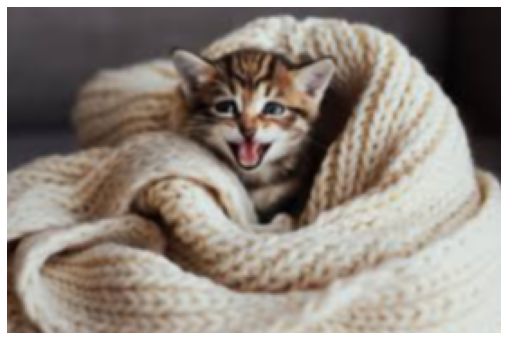

In [0]:
img = load_img('https://raw.githubusercontent.com/aogavrilov/deep_learning_2018-19/master/08.%20Convolutional%20Networks/img.jpeg')
res = conv.forward(img[np.newaxis, :, :, :])
# Выведем размытую картинку
show_img((res[0]).clip(0, 1))

# [Задание 3]

А теперь протестируем, что вы правильно написали свертку и она хорошо работает. 

**!!!Как и в задании 1 скопируйте весь код свертки в класс ниже и замените сумму на умножение. (сумму на умножение нужно менять только внутри подсчета кернела, bias все так же нужно добавлять)!!!**

**Создайте слой, применяющий модифицированную свертку с тремя фильтрами, примените ее к картинке с котиком и возьмите сумму всех чисел в выходе, клипать не нужно. (не забудьте добавить массиву img еще одно измерение, так как наш класс рассчитан на работу с батчами картинок)**

In [0]:
class ModifiedConvLayer:
    def __init__(self, in_channels, out_channels, kernel_size):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        
        # Теперь инициализируем массив с кернелами
        self.kernels =seed_random((out_channels, kernel_size, kernel_size, in_channels), 42)
        self.biases = seed_random((out_channels), 13)
        
    def forward(self, X):       
        # Инициализируем массив с реузльтатом работы всертки
        res = np.zeros((X.shape[0], X.shape[1] - self.kernel_size + 1,
                        X.shape[2] - self.kernel_size + 1, self.out_channels))
        for i, img in enumerate(X):
            for out_channel in range(self.out_channels):
              for y in range(X.shape[1] - self.kernel_size + 1):
                for x in range(X.shape[2] - self.kernel_size + 1):
                  value = 1
                  for in_channel in range(self.in_channels):#convolve(img, kernel)
                    for y_kern in range(self.kernel_size):
                      for x_kern in range(self.kernel_size):
                        value *= img[y + y_kern][x + x_kern][in_channel] * self.kernels[out_channel][y_kern][x_kern][in_channel] 
                  res[i][y][x][out_channel] = value + self.biases[out_channel]
        
        return res

In [0]:
res.shape

(1, 181, 274, 3)

In [0]:
# Создайте объект ModifiedConvLayer с тремя фильтрами и размером фильтров 3 и примените его к котику, а потом
# посчитайте нужную статистику. Изменять сгенерированный в конструкторе фильтр не нужно.
conv = ConvLayer(3, 3, 3)
img = load_img('https://raw.githubusercontent.com/aogavrilov/deep_learning_2018-19/master/08.%20Convolutional%20Networks/img.jpeg')
res = conv.forward(img[np.newaxis, :, :, :])
sum((res[0]).clip(0, 1).reshape(res.shape[0] * res.shape[1] * res.shape[2] * res.shape[3]))

29621.668686770336

## Pytorch Convolutions

### Реализации сверток
Вы уже достаточно много поработали со сверткой, реализованной на for циклах, и понимаете, что она работает слишком долго. Обработка одной кратинки среднего размера занимает около 10 секунд, что непозволительно долго. В реальном мире свертки реализованы с помощью продвинутых алгоритмов. 

Для маленьких размеров фильтров обычно используется метод, в котором свертка заменяется на одно матричное умножение. Это можно сделать, потому что на свертку можно смотреть как на полносвязный слой с некоторыми ограничениями.

Для больших фильтров используется агоритм быстрого преобразования Фурье, с помощью которого также можно выполнить свертку.

Это достатчоно сложные вещи и поэтому не стоит обраoать на них внимание, если вы только начали изучать Deep Learning. Если же Вам интересно, то на arxiv есть статья про то, какие эффективные методы для подсчета сверток существуют https://arxiv.org/abs/1509.09308.

### PyTorch

Хорошая новость заключается в том, что в PyTorch уже есть быстрые свертки и нам не придется писать их самим. 

Давайте потренируемся писать сверточные нейросети в PyTorch.

# [Задание 4 и 5]

**4. В этом задании мы хотим выбрать лучшую модель для работы с cifar10. Ниже будет несколько возможных архитектур, реализуйте их, потренируйте по 3 эпохи и выберите ту, которая в конце обучения достигает наименьшего лосса на тренировочном датасете (имеется в виду последний выведенный функцией train лосс)**

**5. Ответом на задание 5 является лосс на !!!тестовом!!! датасете модели, которую Вы выбрали в задании 4. (средений лосс по кртинке, который выводит print_test_loss)**

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
from torchvision import transforms
from tqdm import tqdm_notebook

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def print_test_loss(net):
    # выбираем функцию потерь
    loss_fn = torch.nn.CrossEntropyLoss()
    
    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(testloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch
        # forward + loss calc
        y_pred = net(X_batch)
        loss = loss_fn(y_pred.cpu(), y_batch.cpu())

        # добавляем лосс
        running_loss += loss
    print("Test Loss: {}".format(running_loss / len(testloader)))
    
def train(net):
    # выбираем функцию потерь
    loss_fn = torch.nn.CrossEntropyLoss()

    # выбираем алгоритм оптимизации и learning_rate
    learning_rate = 1e-4
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    # итерируемся
    for epoch in tqdm_notebook(range(3)):
        running_loss = 0.0
        for i, batch in enumerate(tqdm_notebook(trainloader)):
            # так получаем текущий батч
            X_batch, y_batch = batch
            X_batch = torch.FloatTensor(X_batch).cuda()
            y_batch = torch.LongTensor(y_batch).cuda()
            # обнуляем градиент
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = net(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            # добавим лосс
            running_loss += loss
            # выведем качество каждые 2000 батчей
            if i % 2000 == 1999:
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0


    print('Обучение закончено')
    return net

# Простые архитектуры

**!!!ВАЖНО, Чтобы добиться воспроизводимости результатов, вставьте перед кажджым объявлением слоя
torch.manual_seed(0) + запукайте код в колабе + не используйте GPU!!!**

#### Архитектура 1:
Активация - ReLu
1. Conv(in_channels=3, out_channels=6, kernel_size=5)
2. MaxPool(kernel_size=2, stride=2)
3. Conv(in_channels=6, out_channels=16, kernel_size=5)
4. MaxPool(kernel_size=2, stride=2)
4. Linear(output=120)
5. Linear(output=84)
6. Linear(output=10)

In [0]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
class SimpleConvNet1(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet1, self).__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.cuda()
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 5 * 5 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [0]:
n_1 = SimpleConvNet1().cuda()
net1 = train(n_1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


[1,  2000] loss: 2.064
[1,  4000] loss: 1.868
[1,  6000] loss: 1.766
[1,  8000] loss: 1.682
[1, 10000] loss: 1.635
[1, 12000] loss: 1.618



[2,  2000] loss: 1.567
[2,  4000] loss: 1.538
[2,  6000] loss: 1.507


KeyboardInterrupt: ignored

In [0]:
print_test_loss(net1.cuda())

**!!!ВАЖНО, Чтобы добиться воспроизводимости результатов, вставьте перед кажджым объявлением слоя
torch.manual_seed(0)!!!**


#### Архитектура 2:
В этой архитектуре мы немного поэкспериментируем и используем необычные вещи, а именно активацию tanh и вместо MaxPooling используем AveragePooling.

Активация - tanh
1. Conv(in_channels=3, out_channels=6, kernel_size=5)
2. AvgPool(kernel_size=2, stride=2)
3. Conv(in_channels=6, out_channels=16, kernel_size=5)
4. AvgPool(kernel_size=2, stride=2)
4. Linear(output=120)
5. Linear(output=84)
6. Linear(output=10)

In [0]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
class SimpleConvNet2(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet2, self).__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = x.cuda()
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))
        x = x.view(-1, 5 * 5 * 16)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [0]:
n_2 = SimpleConvNet2().cuda()
net2 = train(n_2)

In [0]:
print_test_loss(net2)

# Более сложные архитектуры

**!!!ВАЖНО, Чтобы добиться воспроизводимости результатов, вставьте перед кажджым объявлением слоя
torch.manual_seed(0)!!!**

#### Архитектура 3:
А здесь мы добавим еще сверточных слоев и уберем один полносвязный!

Активация - ReLu
1. Conv(in_channels=3, out_channels=64, kernel_size=3)
* Conv(in_channels=64, out_channels=64, kernel_size=3)
* MaxPool(kernel_size=2, stride=2)
* Conv(in_channels=64, out_channels=64, kernel_size=3)
* Conv(in_channels=64, out_channels=64, kernel_size=3)
* MaxPool(kernel_size=2, stride=2)
* Linear(output=60)
* Linear(output=10)

In [0]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
class SimpleConvNet3(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet3, self).__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.fc1 = nn.Linear(5 * 5 * 64, 60)
        self.fc2 = nn.Linear(60, 10)
        
    def forward(self, x):
        x = x.cuda()
        x = self.pool(F.relu(self.conv2(F.relu(self.conv1(x)))))
        x = self.pool(F.relu(self.conv4(F.relu(self.conv3(x)))))
        x = x.view(-1, 5 * 5 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [0]:

net3 = train(SimpleConvNet3().cuda())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


[1,  2000] loss: 1.920
[1,  4000] loss: 1.646
[1,  6000] loss: 1.512
[1,  8000] loss: 1.447
[1, 10000] loss: 1.405
[1, 12000] loss: 1.338



[2,  2000] loss: 1.291
[2,  4000] loss: 1.230
[2,  6000] loss: 1.215
[2,  8000] loss: 1.181
[2, 10000] loss: 1.157
[2, 12000] loss: 1.126



[3,  2000] loss: 1.048
[3,  4000] loss: 1.052
[3,  6000] loss: 1.024
[3,  8000] loss: 0.986
[3, 10000] loss: 0.992
[3, 12000] loss: 0.973


Обучение закончено


In [0]:
print_test_loss(net3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Test Loss: 0.9676393270492554


**!!!ВАЖНО, Чтобы добиться воспроизводимости результатов, вставьте перед кажджым объявлением слоя
torch.manual_seed(0)!!!**

#### Архитектура 4:
А что если мы пойдем еще глубже!!! (Осторожнее, тренироваться будет час, поэтому обновите подключение к ноутбуку, прежде чем запускать ячейку, иначе может быть таймаут)


Активация ReLu
1. Conv(in_channels=3, out_channels=64, kernel_size=3)
* Conv(in_channels=64, out_channels=64, kernel_size=3)
1. Conv(in_channels=64, out_channels=64, kernel_size=3)
* Conv(in_channels=64, out_channels=64, kernel_size=3)
* MaxPool(kernel_size=2, stride=2)
* Conv(in_channels=64, out_channels=128, kernel_size=3)
* Conv(in_channels=128, out_channels=128, kernel_size=3)
1. Conv(in_channels=128, out_channels=128, kernel_size=3)
* Conv(in_channels=128, out_channels=128, kernel_size=3)
* MaxPool(kernel_size=2, stride=2)
* Linear(output=10)

In [0]:
class SimpleConvNet4(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet4, self).__init__()
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        self.conv1_1 =  nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3)
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.conv1_3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.conv1_4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3)
        self.conv2_3 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3)
        self.conv2_4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3)
        self.fc = nn.Linear(2 * 2 * 128, 10)
        
    def forward(self, x):
        x = x.cuda()
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = F.relu(self.conv1_3(x))
        x = F.relu(self.conv1_4(x))
        x = self.pool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = F.relu(self.conv2_3(x))
        x = F.relu(self.conv2_4(x))
        x = self.pool(x)
        x = x.view(-1, 2 * 2 * 128)
        x = self.fc(x)
        
        return x

In [6]:
n_4 = SimpleConvNet4().cuda()
net4 = train(n_4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


[1,  2000] loss: 2.066
[1,  4000] loss: 1.816
[1,  6000] loss: 1.632
[1,  8000] loss: 1.547
[1, 10000] loss: 1.489
[1, 12000] loss: 1.412



[2,  2000] loss: 1.350
[2,  4000] loss: 1.309
[2,  6000] loss: 1.277
[2,  8000] loss: 1.233
[2, 10000] loss: 1.205
[2, 12000] loss: 1.187



[3,  2000] loss: 1.157
[3,  4000] loss: 1.127
[3,  6000] loss: 1.097
[3,  8000] loss: 1.072
[3, 10000] loss: 1.067
[3, 12000] loss: 1.025


Обучение закончено


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


RuntimeError: ignored

In [7]:
print_test_loss(net4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


RuntimeError: ignored